In [19]:
CUDA_VISIBLE_DEVICES=""

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import random
import numpy as np
import pandas as pd      
import os
from PIL import Image
import glob
import datetime

%matplotlib inline

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.11.0


In [20]:
SEED = 42

np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

tf.keras.utils.set_random_seed(42)

os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [21]:
img_height = 224
img_width = 224
batch_size = 32
data_dir = "scaled_chest_xray"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")
    

In [22]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  directory=train_dir,
  validation_split=0.2,
  subset="training",
  seed=SEED,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.utils.image_dataset_from_directory(
  directory=train_dir,
  validation_split=0.2,
  subset="validation",
  seed=SEED,
  image_size=(img_height, img_width),
  batch_size=batch_size)

print(train_ds.class_names)

Found 5232 files belonging to 2 classes.
Using 4186 files for training.
Found 5232 files belonging to 2 classes.
Using 1046 files for validation.
['NORMAL', 'PNEUMONIA']


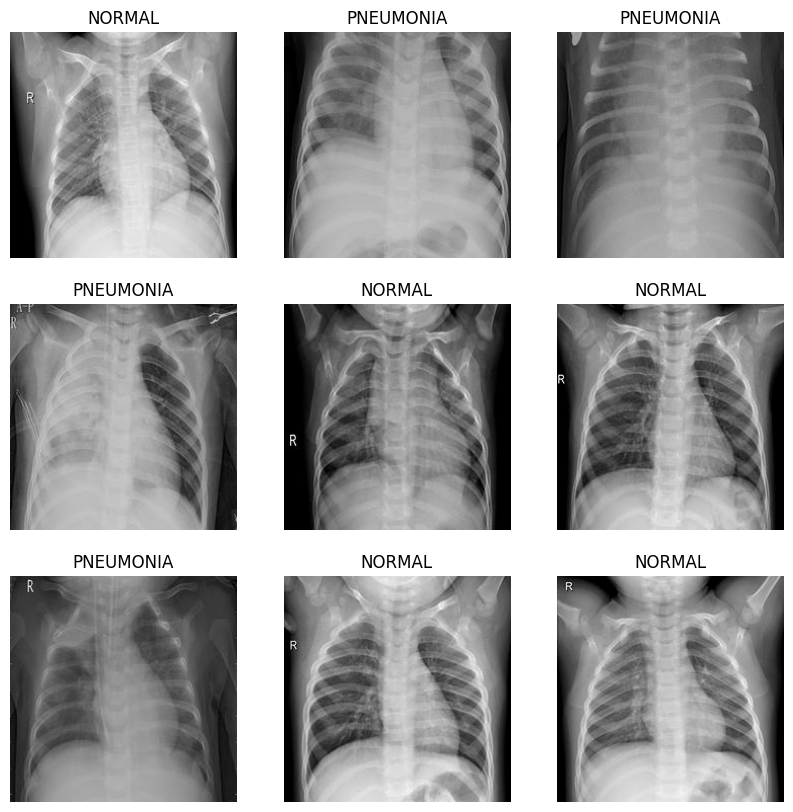

In [23]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [24]:
def get_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(img_width, img_height, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
  ])
  return model

In [25]:
keras.backend.clear_session()
model = get_model()
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=3e-5), metrics='binary_accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [27]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


history = model.fit(train_ds,
          batch_size = batch_size, epochs = 10,
          validation_data=val_ds,
          steps_per_epoch=len(train_ds),
          validation_steps=len(val_ds),
          callbacks=[tensorboard_callback])

Epoch 1/10
131/131 [==============================] - 14s 108ms/step - loss: 11.3789 - binary_accuracy: 0.2623 - val_loss: 11.7235 - val_binary_accuracy: 0.2400
Epoch 2/10
131/131 [==============================] - 11s 86ms/step - loss: 11.3789 - binary_accuracy: 0.2623 - val_loss: 11.7236 - val_binary_accuracy: 0.2400
Epoch 3/10
131/131 [==============================] - 14s 109ms/step - loss: 11.3789 - binary_accuracy: 0.2623 - val_loss: 11.7236 - val_binary_accuracy: 0.2400
Epoch 4/10
131/131 [==============================] - 16s 117ms/step - loss: 11.3789 - binary_accuracy: 0.2623 - val_loss: 11.7236 - val_binary_accuracy: 0.2400
Epoch 5/10
131/131 [==============================] - 18s 134ms/step - loss: 11.3789 - binary_accuracy: 0.2623 - val_loss: 11.7236 - val_binary_accuracy: 0.2400
Epoch 6/10
131/131 [==============================] - 15s 114ms/step - loss: 11.3789 - binary_accuracy: 0.2623 - val_loss: 11.7236 - val_binary_accuracy: 0.2400
Epoch 7/10
131/131 [===============